This practise notebook contains a few visualizations of the same objectivey - plotting locations in a map using three different libraries - plotly, geopandas and folium.

In [177]:
from google.colab import files
files.upload()

Saving airport_data.csv to airport_data (1).csv


{'airport_data.csv': b'id,airport_name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_time_zone,type,source\r\n1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689835,145.3919983,5282,10,U,Pacific/Port_Moresby,airport,OurAirports\r\n2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207079887,145.7890015,20,10,U,Pacific/Port_Moresby,airport,OurAirports\r\n3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789856,144.2960052,5388,10,U,Pacific/Port_Moresby,airport,OurAirports\r\n4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports\r\n5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380356,147.2200012,146,10,U,Pacific/Port_Moresby,airport,OurAirports\r\n6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830118,143.6690063,19,10,U,Pacific/Port_Moresby,airport,OurAirports\r\n7,Narsarsuaq Airport,Narssarss

In [178]:
import pandas as pd

In [179]:
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from shapely.geometry import Point

In [180]:
!pip install geopandas
import geopandas

In [181]:
df_airports = pd.read_csv('airport_data.csv')
df_airports.head()

,id,airport_name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_time_zone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [182]:
df_airports['location'] = df_airports[['latitude', 'longitude']].apply(lambda x : (x[0], x[1]), axis=1)
df_airports['location'].head()

0           (-6.081689835, 145.3919983)
1    (-5.207079887, 145.78900149999998)
2           (-5.826789856, 144.2960052)
3               (-6.569803, 146.725977)
4    (-9.443380356, 147.22000119999998)
Name: location, dtype: object

## Task 1: Location of Airports in the World

### Approach 1:Using plotly

In [183]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_airports.longitude,
        lat = df_airports.latitude,
        text = df_airports['airport_name'],
        marker = {'size':2}
        ))

fig.update_layout(
    title='Location of Airports in the World',
    #geo_scope='asia'
)

fig.show()

In [184]:
#Using this data for getting country codes
df_country_codes = px.data.gapminder().query("year==2007")[['country', 'iso_alpha']]

airport_by_country = df_airports.country.value_counts().reset_index().rename({'index':'country', 'country':'count'}, axis=1)
df = pd.merge(df_airport_by_country, df_country_codes, how='inner', on='country')

fig = go.Figure(data=go.Choropleth(
    locations = df['iso_alpha'],
    z = df['count'],
    colorscale='reds'
))

fig.update_layout(
    title_text = 'Airport Density'
)

fig.show()

### Approach 2: Using geopandas

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



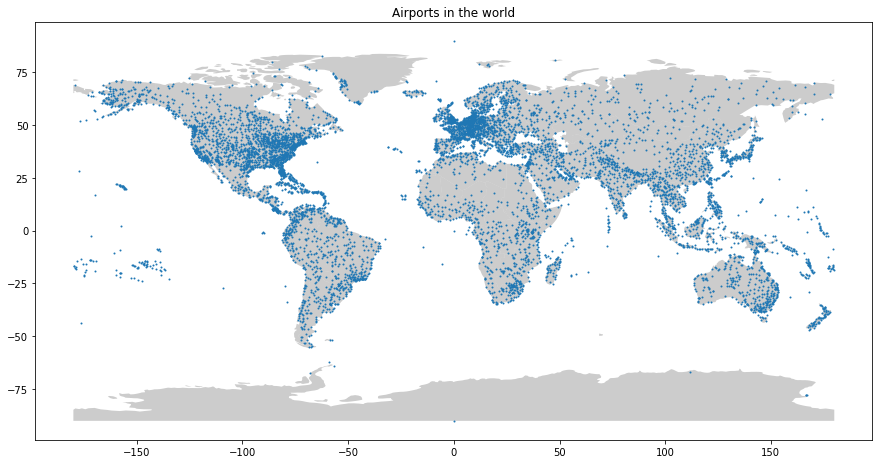

In [185]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

geometry = [Point(xy) for xy in zip(df_airports.longitude, df_airports.latitude)]

crs = {'init':'epsg:4326'} #co-oridnate reference system
geodf = geopandas.GeoDataFrame(df_airports, crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, alpha=0.4, color='grey')
geodf.plot(ax=ax, markersize=1)
plt.title('Airports in the world')
plt.show()

### Approach 3 : Using folium

In [186]:
import folium

base_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
airport_locations = list(df_airports[df_airports['country'] == 'India']['location'])
for loc in airport_locations:
  folium.CircleMarker(location=loc,
                        radius=2,
                        weight=5).add_to(base_map)

base_map